In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import torch
import matplotlib.pyplot as plt
import gip_bnn

In [16]:
plt.style.use('ggplot')

### Dataset stuff here:

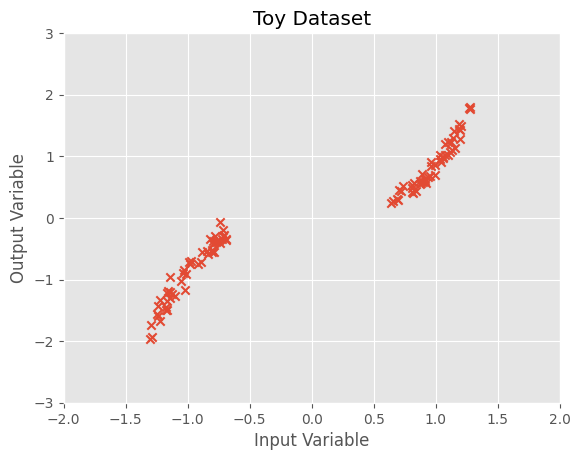

In [22]:
noise_std = torch.tensor(4.0)
dataset_size = 100

x_neg, x_pos = torch.zeros(dataset_size//2), torch.zeros(dataset_size//2)
x_neg, x_pos = x_neg.uniform_(-4, -2), x_pos.uniform_(2, 4)
x = torch.cat((x_neg, x_pos))

y = x**3 + noise_std * torch.normal(torch.zeros(dataset_size), torch.ones(dataset_size))

x = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()

plt.scatter(x, y, marker='x')
plt.title('Toy Dataset')
plt.xlabel('Input Variable')
plt.ylabel('Output Variable')
plt.xlim(-2, 2)
plt.ylim(-3, 3)
plt.show()

### Do some experiments

In [149]:
num_induce = 50
inducing_points = x[torch.randperm(dataset_size)[:num_induce]].unsqueeze(1)

gip_model = gip_bnn.GINetwork(1, [20, 20], 1, inducing_points)
print(gip_model)

opt = torch.optim.Adam(
    gip_model.parameters(),
    lr = 0.01
)

GINetwork(
  (nonlinearity): ELU(alpha=1.0)
  (network): ModuleList(
    (0): GILayer(
      (nonlinearity): ELU(alpha=1.0)
    )
    (1): GILayer(
      (nonlinearity): ELU(alpha=1.0)
    )
    (2): GILayer(
      (nonlinearity): ELU(alpha=1.0)
    )
  )
)


In [150]:
loss_evo = []
ll_evo = []
kl_evo = []

for epoch in range(1, 2001):  # epochs
    if epoch % 1000 == 0:
        print('epoch: ', epoch)
    opt.zero_grad()

    elbo, ll, kl, noise = gip_model.elbo_loss(x.unsqueeze(1), y.unsqueeze(1), num_samples=1)
    loss_evo.append(elbo.item())
    ll_evo.append(ll.item())
    kl_evo.append(kl.item())

    elbo.backward()
    opt.step()

epoch:  1000
epoch:  2000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


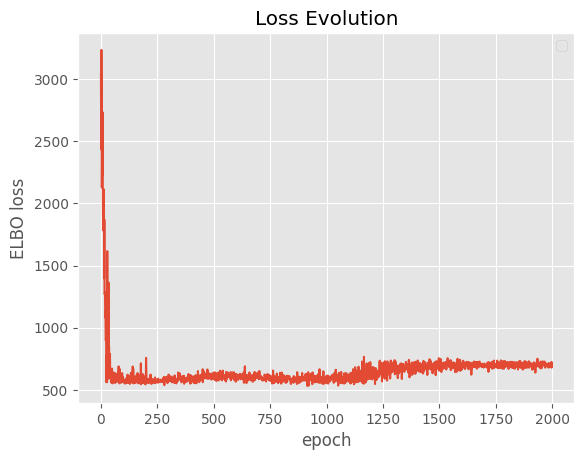

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


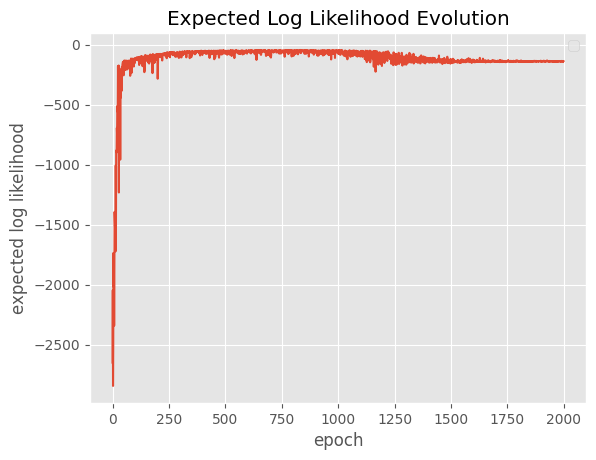

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


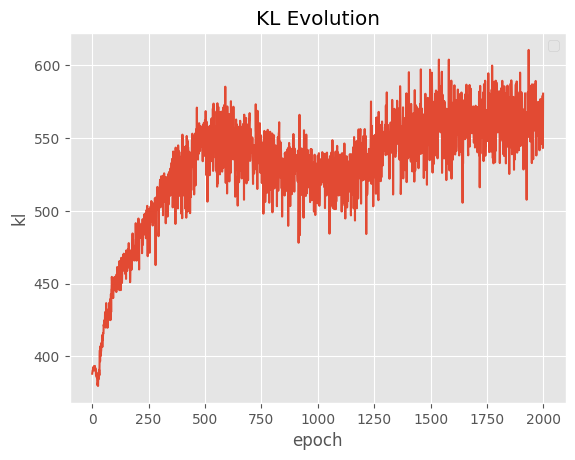

In [151]:
plt.plot(loss_evo)
plt.ylabel('ELBO loss')
plt.xlabel('epoch')
plt.legend()
plt.title('Loss Evolution')
plt.show()

plt.plot(ll_evo)
plt.ylabel('expected log likelihood')
plt.xlabel('epoch')
plt.legend()
plt.title('Expected Log Likelihood Evolution')
plt.show()

plt.plot(kl_evo)
plt.ylabel('kl')
plt.xlabel('epoch')
plt.legend()
plt.title('KL Evolution')
plt.show()